<a href="https://colab.research.google.com/github/ZamiraKholmatova/Interactive-Statistics-Notebooks/blob/master/Logistic_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear and logistic regression

- Intro
- Setup
- Data load:
  - Data for linear regression
  - Data for logistic regression
- Application:
  - Linear regression example
  - Logistic regression example
- Conclusion
- References / Acknowledgements

## Intro

In this notebook we will cover two simple approaches for supervised learning. The linear regression is used for predicting a quantitative response,while the logistic regression is a tool for predicting a binary dependent variable.

## Setup
Here we can see packages to install.

In [0]:
! pip install ipywidgets
! jupyter nbextension enable --py widgetsnbextension

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## Data load 

We will use diabetes dataset for linear regression. Features will be age, sex, body mass index, average blood pressure, and six blood serum measurements, which were observed for 442 patients. The response variable will be a quantitative measure of disease progression one year after baseline.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris
from scipy.special import expit

### Data for linear regression

In [0]:
data_linreg = datasets.load_diabetes()
df_linreg = pd.DataFrame(data_linreg['data'], columns=data_linreg['feature_names'])

In [0]:
@interact
def show_articles_more_than(column=df_linreg.columns, x=20):
    return df_linreg[column].loc[:x].hist()

interactive(children=(Dropdown(description='column', options=('age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4…

### Data for logistic regression

In [0]:
iris = load_iris()

data_logreg = iris
df_logreg = pd.DataFrame(data_logreg['data'], columns=data_logreg['feature_names'])

# Let's take the first data column and first two classes for our experiments
y = iris.target
X = iris.data[y!=2,0:1]
y = y[y!=2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
@interact
def show_articles_more_than(column=df_logreg.columns, x=20):
    return df_logreg[column].loc[:x].hist()

interactive(children=(Dropdown(description='column', options=('sepal length (cm)', 'sepal width (cm)', 'petal …

## Application

### Linear regression example

We will consider simple linear regression with a quantitative response Y and a single predictor X. Linear regression assumes that a linear relationship exists between X and Y: $$Y = b_0 + b_1 * X\ ,$$ where $b_0$ is the intercept, $b_1$ is the slope terms on the linear model.

Coefficient of determination shows us, how much do we gain using this model instead of mean model ($Y = \bar{Y}$)

The slope: 
 938.2378612512637
The intercept: 
 152.91886182616167
Mean squared error: 2548.07
Coefficient of determination: 0.47


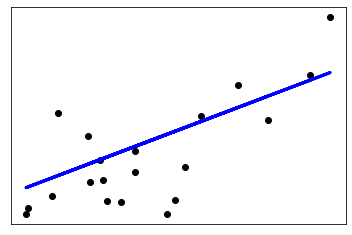

In [0]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('The slope: \n', regr.coef_[0])
print('The intercept: \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Logistic regression example

In the chosen dataset, the response falls into one of two classes (1 or 3). Instead of directly modeling this response, the logistic regression models the probability that Y belongs to a particular class.

We will model the following relationship: $$p(X) = Pr(Y =1|X) = b_0 + b_1*X,$$
where $b_0$ and $b_1$ represent the intercept and the slope of the linear regression considered above.

Sklearn accuracy: 0.85


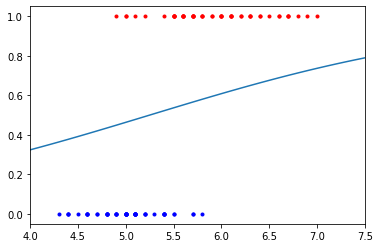

In [0]:
#Create logistic regression object
model_lib = LogisticRegression(solver='liblinear', multi_class='ovr')

# Train the model using the training sets
model_lib.fit(X, y)

# Make predictions using the testing set
y_pred = model_lib.predict(X_test)

# Accuracy of the model
accuracy = accuracy_score(y_pred, y_test)
print("Sklearn accuracy:", accuracy)

#Coefficients of the model: slope and intercept
b1 = model_lib.coef_[0][0] 
b0 = model_lib.intercept_[0]

# Visualizing the resulting sigmoid
x = np.arange(-100, 100, 0.1)
p = np.exp(b0 + b1 * x) / (1 + np.exp(b0 + b1 * x))
plt.plot(x, p, label="sigmoid")
plt.plot(iris.data[iris.target==0,0:1], [0]*50, 'bo', markersize=3)
plt.plot(iris.data[iris.target==1,0:1], [1]*50, 'ro', markersize=3)
plt.xlim(4, 7.5)
plt.show()

## Conclusion

During this tutorial, we have seen basic examples of linear and logistic regression. 

When we work with linear regression, the following problems can occur:
- non-linearity of the relationship between predictor and response;
- correlation of error terms;
- non-constant variance of error terms;
- outliers;
- high-leverage points;
- collinearity.

We can use residual plots to look at the data distribution and overcome the problems discribed above.

When we work with logistic regression, the following problems can occur:
- when the classes are well-separated, the logistic regression becomes unstable;
- if X is approximately normal in each class, the logistic regression also becomes unstable;
- it is difficult for us to work with the logistic regression, when we have more than two response classes.

You can use linear discriminant ananlysis to overcome these problems :)



## References / Acknowledgements

- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112, pp. 3-7). New York: springer.
- https://en.wikipedia.org/wiki/Linear_regression
- https://en.wikipedia.org/wiki/Logistic_regression
- https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
- https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py
- https://towardsdatascience.com/a-comprehensive-study-of-linear-vs-logistic-regression-to-refresh-the-basics-7e526c1d3ebe